DATA SCIENCE INTENDSHIP AT OASIS INFOBYTE

PROJECT I TASK 2

NAME:VIDHYA S

importing dataset 

In [8]:
# data processing
import numpy as np 
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset into pandas dataframe

In [9]:
df = pd.read_csv('Unemployment in India.csv.')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Basic information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Renaming the column

In [11]:
df.rename(columns={'Region.1': 'Area'}, inplace=True)

Checking for missing values


In [13]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [14]:
#Removing unintentional spaces in columns
df.columns = df.columns.str.strip()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [15]:
#Converting data types
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

In [17]:
#Summary Statistics
# selecting the categorical variables
categorical_var = df.select_dtypes(include='object')
# Obtaining summary statistics for the categorical variables
categorical_stat = categorical_var.describe().T
categorical_stat


,count,unique,top,freq
Region,740,28,Andhra Pradesh,28
Frequency,740,2,Monthly,381
Area,740,2,Urban,381


In [18]:
# selecting numerical variables
numerical_var = df.select_dtypes(exclude='object')
# Obtaining summar statistics for the numerical variables
numerical_stat = numerical_var.describe().T
numerical_stat

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


In [20]:
#Dropping irrelevent column
df = df.drop('Frequency', axis=1)
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural


Outlier detection

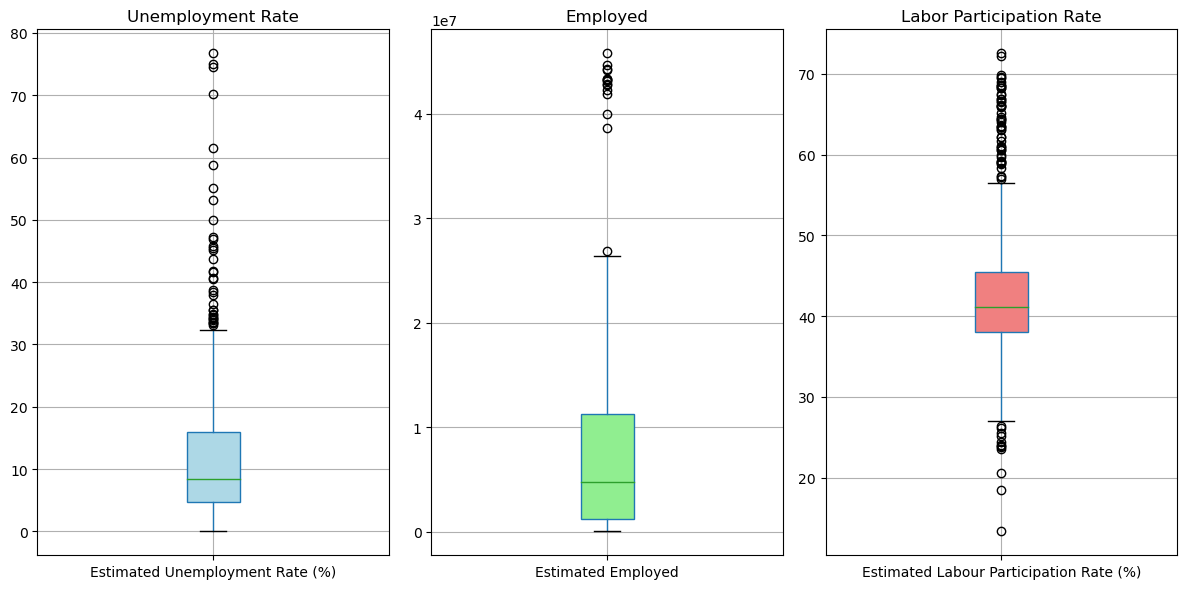

In [21]:

colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a figure with three subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Unemployment Rate
plt.subplot(131)
df.boxplot(column='Estimated Unemployment Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[0])  # Set the color of the first box
plt.title('Unemployment Rate')

# Subplot 2: Employed
plt.subplot(132)
df.boxplot(column='Estimated Employed', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[1])  # Set the color of the second box
plt.title('Employed')

# Subplot 3: Labor Participation Rate
plt.subplot(133)
df.boxplot(column='Estimated Labour Participation Rate (%)', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[2])  # Set the color of the third box
plt.title('Labor Participation Rate')

plt.tight_layout()
plt.show()


Correlation plot

C:\Users\vidhy\AppData\Local\Temp\ipykernel_24256\2143184909.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)


<Axes: >

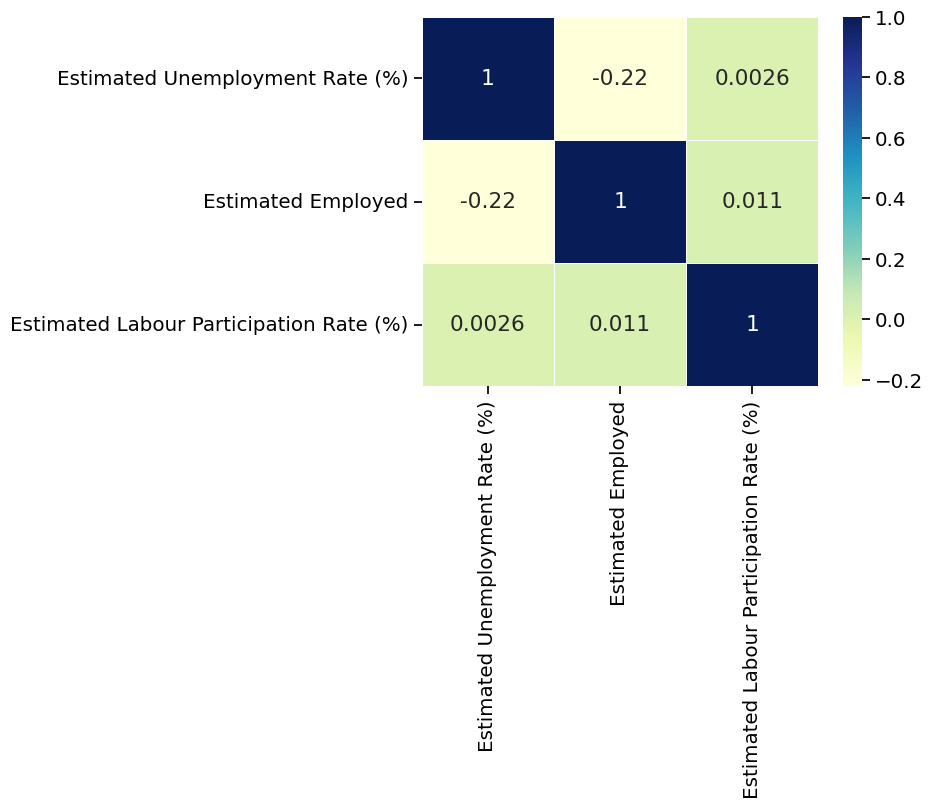

In [24]:

sns.set_context('notebook', font_scale=1.3)
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=0.5)

Unemployment rate in India during Covid-19



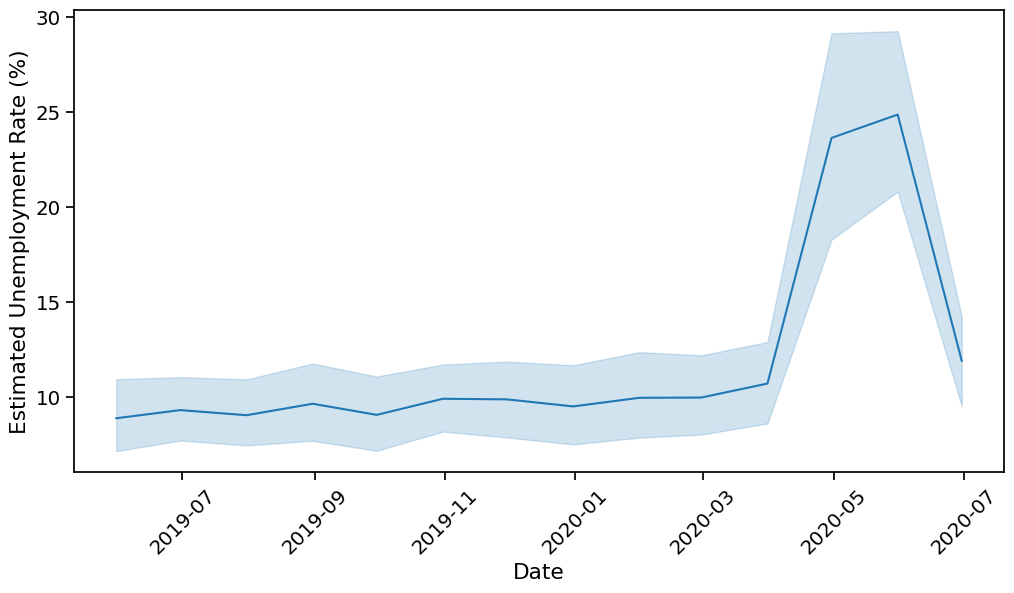

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()